In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sstat
from mpmath import mp
import math
import random
import scipy

psd = pd.DataFrame
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [11]:
def single_lik(mu):
   y= tfd.MultivariateNormalFullCovariance(mu,sigma_obs)
   return y

In [12]:
def prior():
    return tfd.MultivariateNormalFullCovariance(mu0,sigma0)

In [13]:
def proposal(theta):
  return tfd.MultivariateNormalFullCovariance(theta,cov)

In [14]:
#def K_h(u,H):
#    return 1/(np.sqrt(2*math.pi))*pow(np.linalg.det(H), -1/2)*np.exp(-1/2*u@np.linalg.inv(H)@u.T)

In [47]:
def my_kernel(u):
  return 1/(np.sqrt(2*math.pi))*np.exp(-1/2*u**2)

In [48]:
def K_h(u,h):
  return my_kernel(u/h)/h

In [15]:
def S2(y):
  return np.mean(y,axis=0)


In [67]:
def abc_algo (N, S, y_obs, h):
    s_obs = S(y_obs)
    theta=[]
    s = []
    y = []
    theta_0 = prior().sample()
    y_0 = single_lik(theta_0).sample() 
    s_0 = S(y_0)
    
    
    while (K_h(scipy.spatial.distance.mahalanobis(np.array(s_0),np.array(s_obs), sigma_obs/1000),h)<=0): 
      #((K_h(np.array(s_0)-np.array(s_obs),H)[0]<=np.array([0,0])[0]) and ( K_h(np.array(s_0)-np.array(s_obs),H)[1]<=np.array([0,0])[1])):
        theta_0 = prior().sample()
        y_0 = single_lik(theta_0).sample() 
        s_0 = S(y_0)
   
      
    theta.append(theta_0)
    s.append(s_0)
    y.append(y_0)
    theta_old = theta_0
    s_old = s_0
    y_old = y_0

    for i in range(N):
        theta_current = proposal(theta_old).sample()
        y_current = single_lik(theta_current).sample(1000)
        #y.append(y_current)
        s_current = S(y_current)
               
        prob = min([1.,(K_h(scipy.spatial.distance.mahalanobis(np.array(s_current),np.array(s_obs), sigma_obs),h)*prior().prob(theta_current)*proposal(theta_old).prob(theta_current))/(
             K_h(scipy.spatial.distance.mahalanobis(np.array(s_old),np.array(s_obs), sigma_obs),h)*prior().prob(theta_old)*proposal(theta_current).prob(theta_old))])
        ## u = np.random.uniform(low=0,high=1,size=2)
        u = tfd.Uniform(0,1).sample()
        if u < prob:
              theta_i = theta_current
              s_i = s_current
        else: 
              theta_i = theta_old
              s_i = s_old
              #y.pop()
              #y.append(y_old)

        theta_old = theta_i
        s_old = s_i
        
        theta.append(theta_i)
        s.append(s_i)
        
    return  theta

In [121]:
##VARIABILI:
cov= np.array([[1,0],[0,1]])
mu0 = np.array ([[3,6]])
sigma0 = np.array([[1,0.5],[0.5,1]])
H= scipy.linalg.fractional_matrix_power(sigma0,-0.5)
h = 0.5
n = 1000
mu_obs = np.array ([[1,4]])
sigma_obs=np.array([[1,0.5],[0.5,1]])
y_obs=tfd.MultivariateNormalFullCovariance(mu_obs,sigma_obs).sample(1000)

In [122]:
nuovohalto= abc_algo(n,S2,y_obs,h)

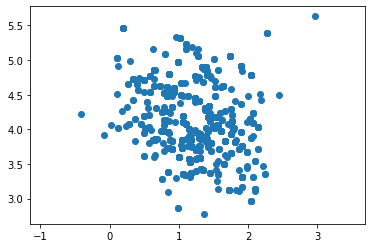

In [123]:
nuovonp=np.asarray(nuovohalto)
nuovonp=np.reshape(nuovonp,[1001,2])
plt.scatter(nuovonp[:,0],nuovonp[:,1])
plt.axis('equal')
## plt.axis([1,1.5,4,4.5])
plt.show()

In [124]:
np.unique(nuovonp[:,1]).shape

(252,)

In [115]:
prova = abc_algo (n, S2, y_obs, h) 

In [117]:
np.asarray(prova).shape

(10001, 1, 2)

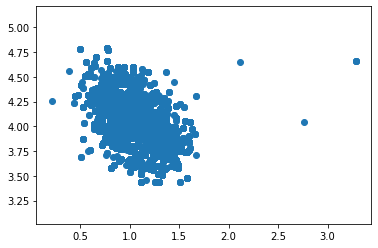

In [118]:
provanp=np.asarray(prova)
provanp=np.reshape(provanp,[10001,2])
plt.scatter(provanp[:,0],provanp[:,1])
plt.axis('equal')
## plt.axis([1,1.5,4,4.5])
plt.show()

In [119]:
np.unique(provanp[:,1]).shape

(789,)

In [120]:
prova

[array([[3.28740004, 4.66164082]]),
 array([[3.28740004, 4.66164082]]),
 array([[3.28740004, 4.66164082]]),
 array([[3.28740004, 4.66164082]]),
 array([[2.7651084, 4.0429237]]),
 array([[2.11251987, 4.65198162]]),
 array([[0.51163423, 3.69166706]]),
 array([[0.51163423, 3.69166706]]),
 array([[0.51163423, 3.69166706]]),
 array([[0.21293932, 4.2598038 ]]),
 array([[0.90344671, 4.11226143]]),
 array([[0.90344671, 4.11226143]]),
 array([[0.83382679, 3.92653016]]),
 array([[0.83382679, 3.92653016]]),
 array([[0.83382679, 3.92653016]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.40077228, 3.83862063]]),
 array([[1.1011027 , 3.89735318]]),
 array([[1.1011027 , 3.8973531

In [113]:
np.unique(provanp[:,0]).shape

(84,)

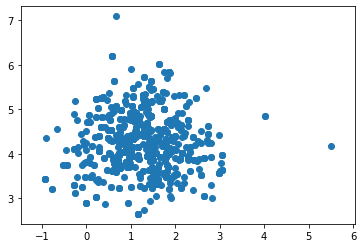

In [43]:
prova1=np.asarray(prova1)
prova1=np.reshape(prova1,[1001,2])
plt.scatter(prova1[:,0],prova1[:,1])
plt.axis('equal')
#plt.axis([-2,5,1,8])
plt.show()

In [30]:
provetutte = []
provetutte.append(prova)
provetutte

[array([[5.51287123, 4.17563983],
        [4.01962137, 4.84024523],
        [4.01962137, 4.84024523],
        ...,
        [1.55247036, 4.14852914],
        [1.69620254, 5.23243634],
        [1.58049557, 5.29969992]])]

In [32]:
##VARIABILI:
cov= np.array([[1,0],[0,1]])
mu0 = np.array ([[6,8]])
sigma0 = np.array([[5,1.2],[1.2,5]])
H= scipy.linalg.fractional_matrix_power(sigma0,-0.5)
n = 1000
mu_obs = np.array ([[1,4]])
sigma_obs=np.array([[1,0.5],[0.5,1]])
y_obs=tfd.MultivariateNormalFullCovariance(mu_obs,sigma_obs).sample(1000)

In [33]:
prova2=abc_algo (n, S2, y_obs, H) 

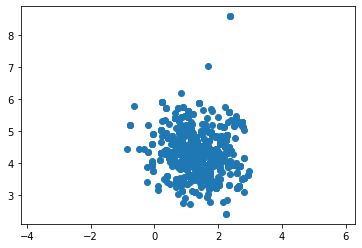

In [42]:
prova2=np.asarray(prova2)
prova2=np.reshape(prova2,[1001,2])
plt.scatter(prova2[:,0],prova2[:,1])
plt.axis('equal')
#plt.axis([-2,5,1,8])
plt.show()